In [39]:
import numpy as np
abbr=['EN','HSN','DN','MN','LMN','CS','OS','DS','JS']

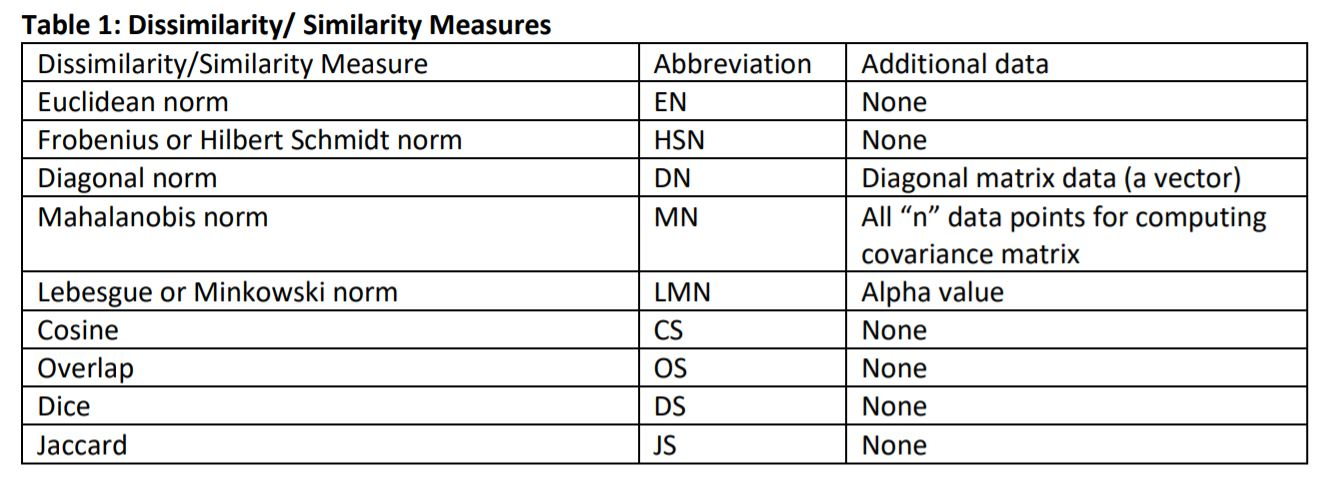

In [164]:
def dsim_sim(arr1,arr2,Measure,Add_data=np.array([])):
    a=1
    if Measure not in abbr:
        print('unidentified Measure input')
        a=a*0
    else:
        while True:
        # Attempt to convert the input to an integer/float
            try:
                arr1_int=arr1.astype('int64')
                arr1_float=arr1.astype('float64')
                arr2_int=arr2.astype('int64')
                arr2_float=arr2.astype('float64')
                arr=arr1-arr2


            # If there was an error converting...
            except ValueError:
                print("The array data type should be float or integer and shape should be same")
                a=a*0
                break

            # Break the loop if no error, i.e. conversion was successful
            else:
                break
    if a==1:
        if Measure=='EN':
            from scipy.spatial import distance
            dst = distance.euclidean(arr1,arr2)
            return (dst,1/(1+dst))
        
        elif Measure=='HSN':
            n=len(arr1)
            A=np.ones((n,n))
            norm=np.matmul(np.matmul(arr1-arr2,A),(arr1-arr2).T)
          
            return (np.sqrt(norm),1/(1+np.sqrt(norm)))
        
        elif Measure=='DN':
            A=np.diag(D)
            n=len(arr1)
            if n!=len(D):
                return "The vector dimension of D isn't compatible"
            else:
                norm=np.matmul(np.matmul(arr1-arr2,A),(arr1-arr2).T)
                if norm<=0:
                    return 'Dissimilarity turns out to be the square root of a negative number'
                else:
                     return (np.sqrt(norm),1/(1+np.sqrt(norm)))
        
               
        elif Measure=='MN':
            n=len(arr1)
            arr=arr1-arr2
            X=Add_data.T
            if X.shape[0]!=n:
                return 'The shape of distribution does not conform with the data points'
            else:
                if np.linalg.det(np.cov(X))==0:
                    return 'The distribution results in a non-invertible covariance matrix'
                else:
                    A=np.linalg.inv(np.cov(X))
                    norm=np.matmul(np.matmul(arr,A),arr.T)
                    return (np.sqrt(norm),1/(1+np.sqrt(norm)))
       
        elif Measure=='LMN':
            n=len(arr1)
            arr=arr1-arr2
            a=Add_data
            if a==0:
                return 'Similarity/ Dissimilarity measures not defined'
            else:
                norm=(sum(arr**a))**(1/a)
                return (norm,1/(1+norm))
            
        
        elif Measure=='CS':
            s1=sum(arr1**2)
            s2=sum(arr2**2)
            s=s1*s2
            s12=np.dot(arr1,arr2)
            norm=s12/np.sqrt(s)
            return ((1-norm)/norm,norm)
        
        elif Measure=='OS':
            s1=sum(arr1**2)
            s2=sum(arr2**2)
            s12=np.dot(arr1,arr2)
            if min(s1,s2)==0:
                return 'Measures not defined; similarity has 0/0 form'
            else:
                norm=s12/min(s1,s2)
                return ((1-norm)/norm,norm)
        
        elif Measure=='DS':
            s1=sum(arr1**2)
            s2=sum(arr2**2)
            s=s1+s2
            s12=2*np.dot(arr1,arr2)
            norm=s12/s
            return ((1-norm)/norm,norm)
        
        else: #Measure=='JS':
            s1=sum(arr1**2)
            s2=sum(arr2**2)
            s12=np.dot(arr1,arr2)
            norm=s12/(s1+s2-s12)
            return ((1-norm)/norm,norm)
        
            
                
    

In [165]:
S=np.array([[4,18,21,37],[14,7,2,11],[3,5,2,13],[11,34,47,26],[71, 2, 1, 15]]) #5 data point for computing covariance
D=np.array([7, 1, 10, -1])# diagonal norm additional data
alpha=6 #Mankowski norm we need to provide alpha value
import numpy as np
arr1=np.array([4,12,3,5])
arr2=np.array([9,8,2,3])
dsim_sim(arr1,arr2,'MN',S) # output dissimilariy and similarity between given data points, given the Measure type and optional data 


(3.5102967568357557, 0.22171490123890655)